In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import pandas as pd
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from nltk.stem import PorterStemmer
import re

In [5]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Functions needed for the code

# function to remove stop words
def remove_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# function to tokenize and lemmatize text
def clean_review_text(text):
    tokenz = word_tokenize(text)
    tokenz = [lemmatizer.lemmatize(token.lower()) for token in tokenz if token.isalpha() and token.lower() not in stop_words]
    return ' '.join(tokenz)

# define a function to perform sentiment analysis
def get_sentiment(text):
    if isinstance(text, float):  # handle missing or null values
        return 0.0  # set sentiment to 0.0
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [8]:
# load the dataset
merged_df = pd.read_csv('/content/covid19_tweets - covid19_tweets.csv')

In [9]:
# replace missing or null values with an empty string
merged_df['user_location'].fillna('', inplace=True)
merged_df['date'].fillna('', inplace=True)

# apply the sentiment analysis function to the review body column
merged_df['sentiment'] = merged_df['user_location'].apply(get_sentiment) + merged_df['date'].apply(get_sentiment)

# print the dataframe head
merged_df.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 5:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,0.000000
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,0.136364
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,0.000000
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 1:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,0.000000
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 6:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,0.000000
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False,0.000000
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False,0.000000
7,Derbyshire LPC,,NaN,2012-02-03 18:08:10,608,355,95,False,2020-07-25 12:27:00,You now have to wear face coverings when out s...,NaN,TweetDeck,False,0.000000
8,Prathamesh Bendre,,"A poet, reiki practitioner and a student of law.",2015-04-25 8:15:41,25,29,18,False,2020-07-25 12:26:59,Praying for good health and recovery of @Chouh...,"['covid19', 'covidPositive']",Twitter for Android,False,0.000000
9,Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺,👇🏻location at link below👇🏻,"Just as the body is one & has many members, & ...",2014-08-17 4:53:22,55201,34239,29802,False,2020-07-25 12:26:54,POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...,"['HurricaneHanna', 'COVID19']",Twitter for iPhone,False,0.000000


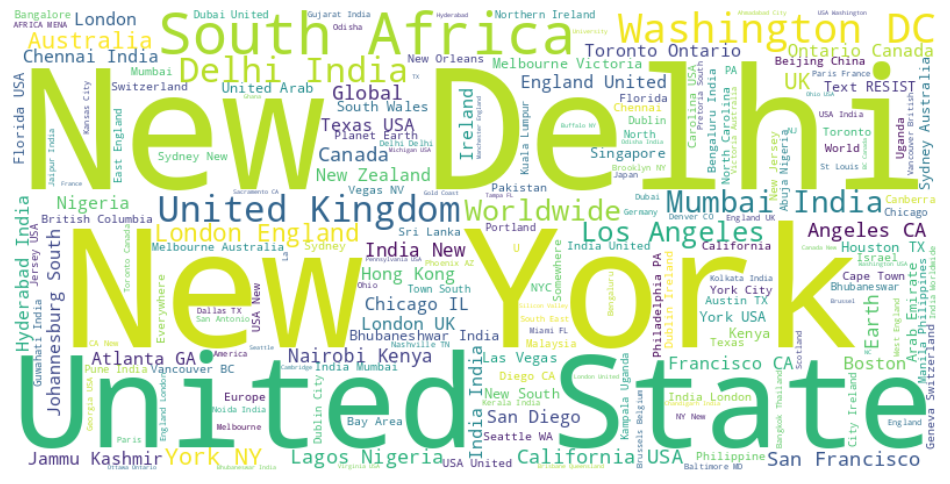

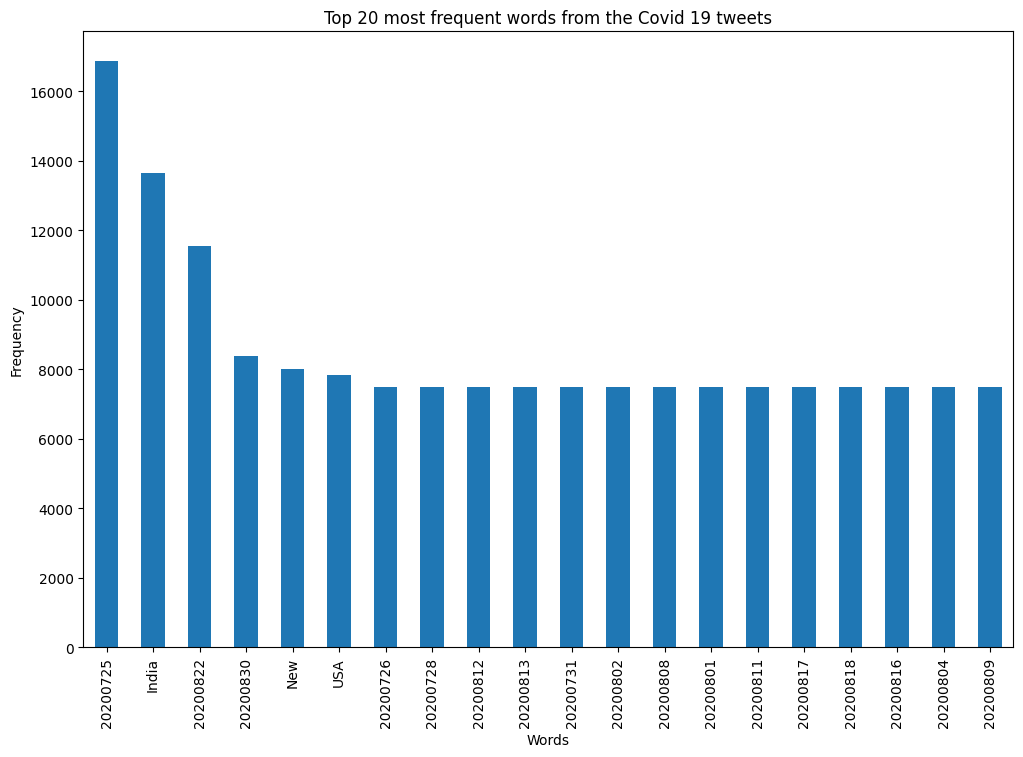

In [12]:
# Using Covid 19 tweets into one column and cleaning it of stopwords for further analysis
merged_df['cleaned_review_body'] = merged_df['user_location'] + ' ' + merged_df['date']

# Define the regular expression pattern to match special characters
pattern = r'[^a-zA-Z0-9\s]'

# Remove special characters from the merged_review_body column
merged_df['cleaned_review_body'] = merged_df['cleaned_review_body'].apply(lambda x: re.sub(pattern, '', x))

# Removing stopwords
merged_df['cleaned_review_body'] = merged_df['cleaned_review_body'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Define the text data
text_data = ' '.join(merged_df['cleaned_review_body'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
print("\n")

# Generate the bar chart
word_counts = pd.Series(text_data.split()).value_counts()[:20]
plt.figure(figsize=(12, 8))
word_counts.plot(kind='bar')
plt.title('Top 20 most frequent words from the Covid 19 tweets')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

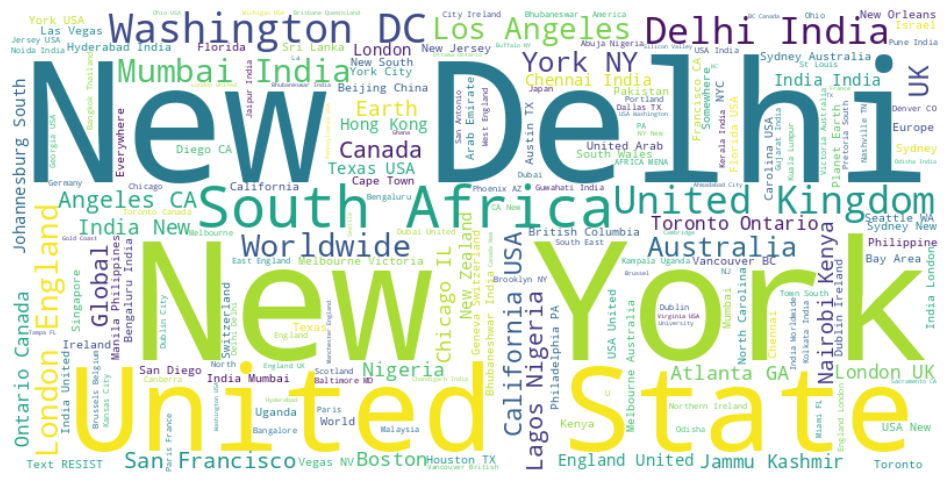

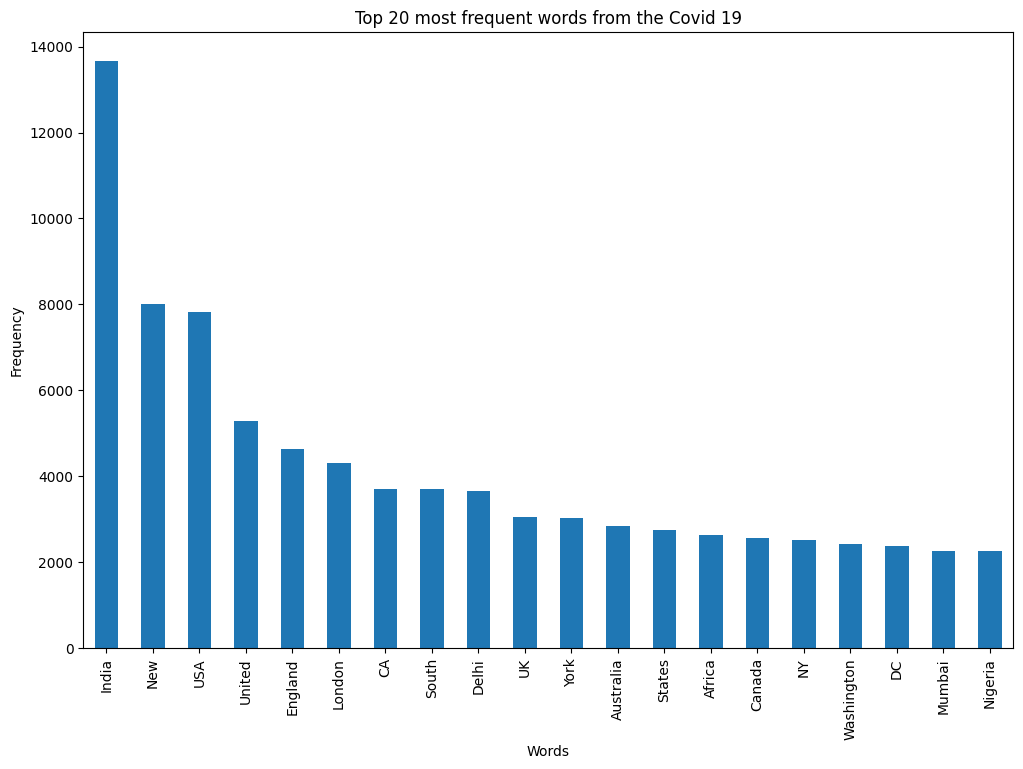

In [13]:
# Using Covid 19 tweets into one column and cleaning it of stopwords for further analysis
merged_df['cleaned_review_body'] = merged_df['user_location'] 
# Define the regular expression pattern to match special characters
pattern = r'[^a-zA-Z0-9\s]'

# Remove special characters from the merged_review_body column
merged_df['cleaned_review_body'] = merged_df['cleaned_review_body'].apply(lambda x: re.sub(pattern, '', x))

# Removing stopwords
merged_df['cleaned_review_body'] = merged_df['cleaned_review_body'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Define the text data
text_data = ' '.join(merged_df['cleaned_review_body'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
print("\n")

# Generate the bar chart
word_counts = pd.Series(text_data.split()).value_counts()[:20]
plt.figure(figsize=(12, 8))
word_counts.plot(kind='bar')
plt.title('Top 20 most frequent words from the Covid 19')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

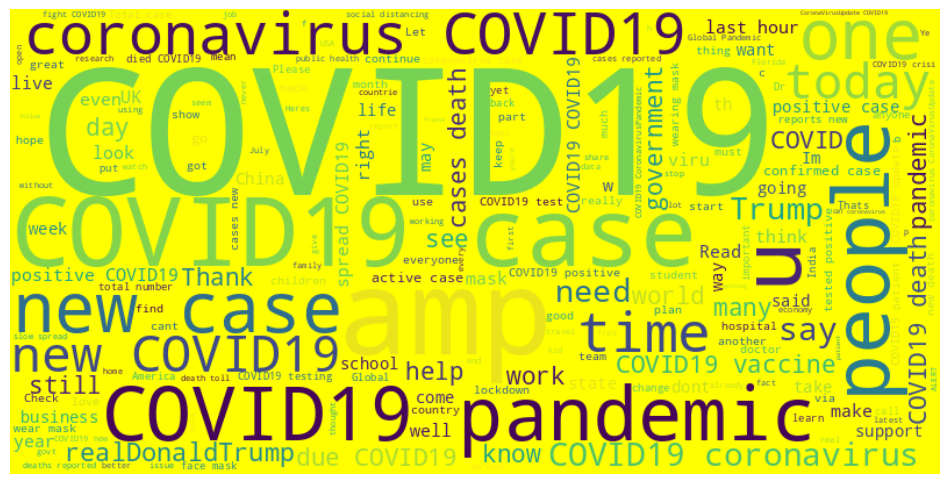

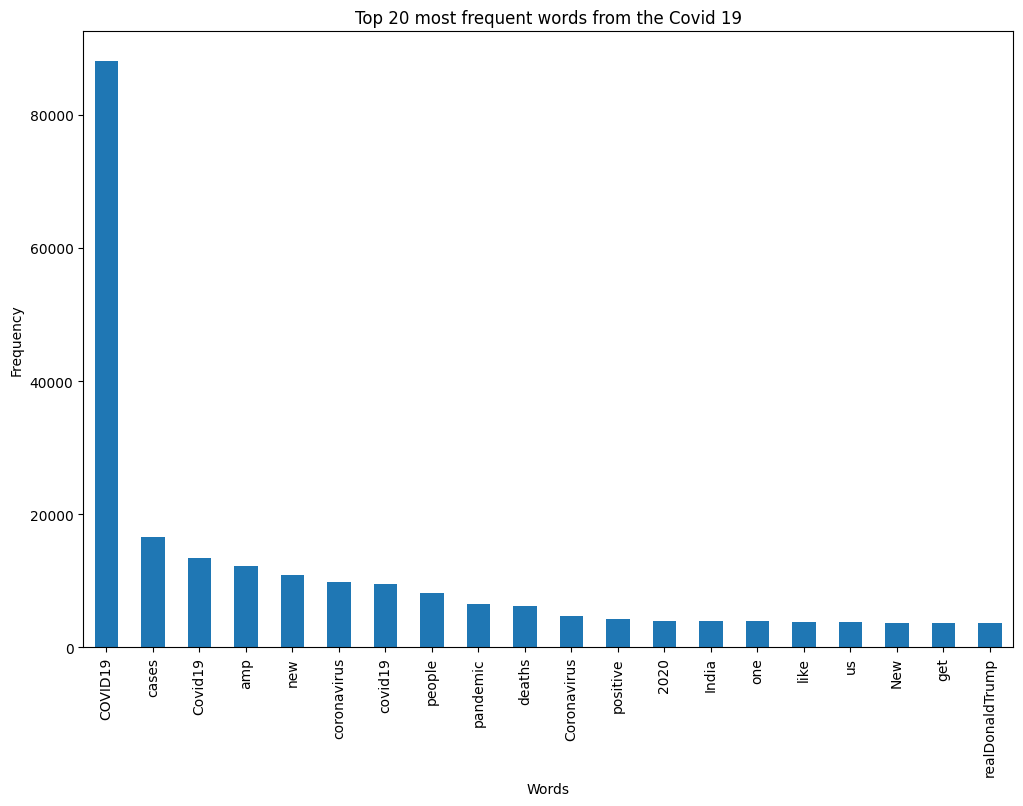

In [14]:
# cleaning it of stopwords for further analysis
merged_df['cleaned_review_body'] = merged_df['text'] 
# Define the regular expression pattern to match special characters
pattern = r'[^a-zA-Z0-9\s]'

# Remove special characters from the merged_review_body column
merged_df['cleaned_review_body'] = merged_df['cleaned_review_body'].apply(lambda x: re.sub(pattern, '', x))

# Removing stopwords
merged_df['cleaned_review_body'] = merged_df['cleaned_review_body'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Define the text data
text_data = ' '.join(merged_df['cleaned_review_body'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='Yellow').generate(text_data)
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
print("\n")

# Generate the bar chart
word_counts = pd.Series(text_data.split()).value_counts()[:20]
plt.figure(figsize=(12, 8))
word_counts.plot(kind='bar')
plt.title('Top 20 most frequent words from the Covid 19')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

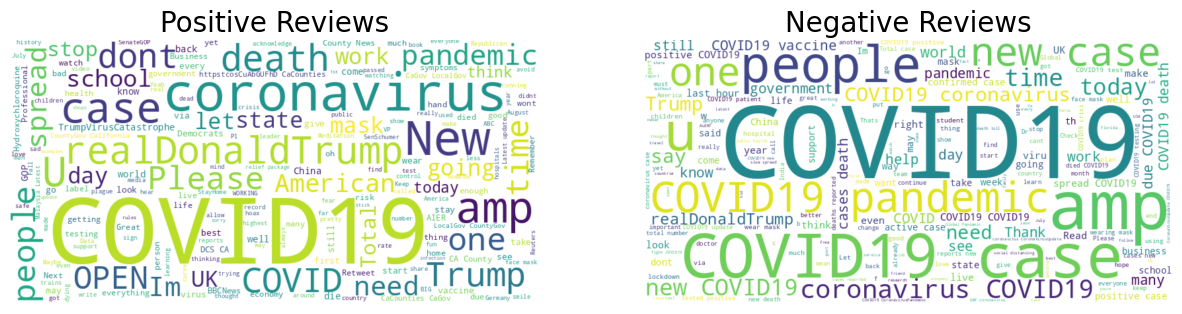

In [15]:
# Wordclouds for positive and negative keywords

# Create separate dataframes for positive and negative reviews
positive_df = merged_df[merged_df['sentiment'] > 0.5]
negative_df = merged_df[merged_df['sentiment'] < 0.5]

# Combine all the reviews into a single string for each dataframe
positive_text = " ".join(review for review in positive_df['cleaned_review_body'])
negative_text = " ".join(review for review in negative_df['cleaned_review_body'])

# Generate wordclouds for positive and negative reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot the wordclouds
fig, axs = plt.subplots(1, 2, figsize=(15, 7.5))
axs[0].imshow(positive_wordcloud, interpolation='bilinear')
axs[0].set_title('Positive Reviews', fontsize=20)
axs[0].axis('off')
axs[1].imshow(negative_wordcloud, interpolation='bilinear')
axs[1].set_title('Negative Reviews', fontsize=20)
axs[1].axis('off')
plt.show()

Classification Report for Sentiment Analysis:               precision    recall  f1-score   support

           0       0.98      0.99      0.98     52125
           1       0.33      0.19      0.24      1608

    accuracy                           0.96     53733
   macro avg       0.65      0.59      0.61     53733
weighted avg       0.96      0.96      0.96     53733



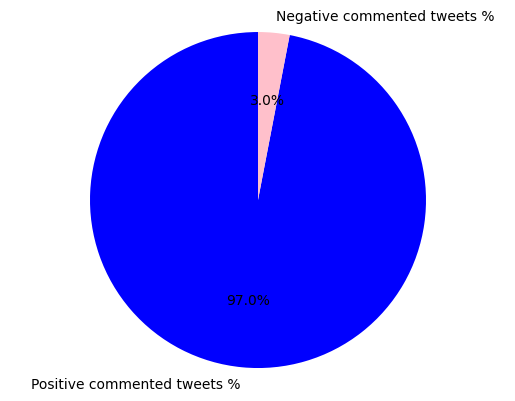

In [16]:
# 1st Method: Bad Review finder using Naive Bayes Classifier ML Model based on star_rating
# Cleaning text
merged_df['cleaned_review_body'] = merged_df['cleaned_review_body'].apply(clean_review_text)

# Generating average_star_rating based on both Amazon and Walmart Ratings
merged_df['star_rating'] = merged_df['user_friends'] 

# defining good/bad products based on star_rating
merged_df['is_bad_product'] = merged_df['star_rating'].apply(lambda x: 1 if x < 2.5 else 0)

# vectorize cleaned_review_body
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(merged_df['cleaned_review_body'])
y = merged_df['is_bad_product']

# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# training Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# prediction on test dataset
y_pred = nb_classifier.predict(X_test)

# Classification report
print("Classification Report for Sentiment Analysis:", classification_report(y_test, y_pred))

good_count = len(merged_df[merged_df['is_bad_product'] == 0])
bad_count = len(merged_df[merged_df['is_bad_product'] == 1])

# Visualize the percentage of Good vs Bad product reviews
labels = ['Positive commented tweets %', 'Negative commented tweets %']
sizes = [good_count, bad_count]
colors = ['Blue', 'Pink']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()
print("\n")

---

In [17]:
merged_df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment,cleaned_review_body,star_rating,is_bad_product
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 5:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,0.000000,smelled scent hand sanitizers today someone pa...,950,0
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,0.136364,hey yankee yankeespr mlb wouldnt made sense pl...,1677,0
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,0.000000,wdunlap realdonaldtrump trump never claimed ho...,9525,0
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 1:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,0.000000,brookbanktv one gift give appreciation simple ...,987,0
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 6:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,0.000000,july medium bulletin novel coronavirusupdates ...,168,0


In [18]:
pd.set_option('display.max_colwidth', None)
merged_df[merged_df['sentiment']>0.9][:3]['text']

10004    Now that we all are untouchables due to #COVID19, and thus equals, I think it's the best time to abolish caste base… https://t.co/Dp0bI3nYCS
10800    @NIHDirector @ABC @BobWoodruff Somebody believing for Beatles and buying songs, somebody believes for Tesla and buy… https://t.co/DivP9LxPlX
12252      Nothing can hide my smile 😁✨💕 #smile #eyes #happiness #sequins #mask #fun #isolation #covid19 #goodvibes #ellesse… https://t.co/1WfMFdp2FK
Name: text, dtype: object

In [19]:
#Geo-Sentiment Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Filter the dataframe to extract only the user_location, sentiment columns
filtered_df = merged_df[['user_location', 'sentiment']]

#Group by user_location and calculate the average sentiment
grouped_df = filtered_df.groupby('user_location').mean()

#Extract top 10 states with the highest negative sentiment
top_10_neg_states = grouped_df.nsmallest(10, 'sentiment')

top_10_neg_states

,sentiment
user_location,
Between Sane and Insane!,-1.0000
Lancastrian in Grim South !,-1.0000
Not a State of Hate!,-1.0000
"Somewhere Horrible, Saving You",-1.0000
The corner of Nasty & Snitty,-1.0000
Under a fucking Gum Tree!!,-0.9375
"HATE TRUMP, USA",-0.8000
"Base of Pikes Peak, Colorado",-0.8000
BrOoklyn / Da BLoOdy BeAN,-0.8000


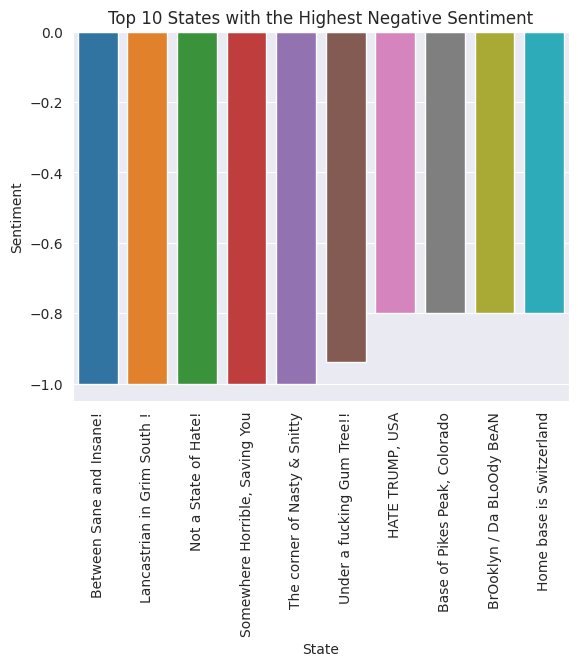

In [20]:
#Plot a barplot of the top 10 states with the highest negative sentiment
sns.set_style('darkgrid')
ax = sns.barplot(x=top_10_neg_states.index, y=top_10_neg_states['sentiment'])
plt.xticks(rotation=90)
ax.set_title('Top 10 States with the Highest Negative Sentiment')
ax.set_xlabel('State')
ax.set_ylabel('Sentiment')
plt.show()


In [21]:
# We'll create a new dataframe called df_location with the user_name, user_location and sentiment columns:
df_location = merged_df[['user_name', 'user_location', 'sentiment']]
df_location.head()

,user_name,user_location,sentiment
0,ᏉᎥ☻լꂅϮ,astroworld,0.000000
1,Tom Basile 🇺🇸,"New York, NY",0.136364
2,Time4fisticuffs,"Pewee Valley, KY",0.000000
3,ethel mertz,Stuck in the Middle,0.000000
4,DIPR-J&K,Jammu and Kashmir,0.000000


In [22]:
# We then use the value_counts() to get the number of tweets from each user_location:
location_counts = df_location['user_location'].value_counts()
location_counts

                              36804
India                          3803
United States                  2470
New Delhi, India               1721
Mumbai, India                  1401
                              ...  
A little east of LAX...           1
#Ireland                          1
PHILADELPHIA                      1
Abilene, KS                       1
Aliwal North, South Africa        1
Name: user_location, Length: 26415, dtype: int64

In [23]:
# Next, we'll perform sentiment analysis on the tweets. We'll use the sentiment column in the merged_df dataframe and create a new dataframe called df_sentiment with the user_name, sentiment and cleaned_review_body columns:
df_sentiment = merged_df[['user_name', 'sentiment', 'cleaned_review_body']]
df_sentiment.head()

,user_name,sentiment,cleaned_review_body
0,ᏉᎥ☻լꂅϮ,0.000000,smelled scent hand sanitizers today someone past would think intoxicated
1,Tom Basile 🇺🇸,0.136364,hey yankee yankeespr mlb wouldnt made sense player pay respect
2,Time4fisticuffs,0.000000,wdunlap realdonaldtrump trump never claimed hoax claim effort
3,ethel mertz,0.000000,brookbanktv one gift give appreciation simple thing always around
4,DIPR-J&K,0.000000,july medium bulletin novel coronavirusupdates drsyedsehrish airnewsalerts ani


In [24]:
# We can then use the value_counts() to get the number of tweets for each sentiment:
sentiment_counts = df_sentiment['sentiment'].value_counts()
sentiment_counts

 0.000000    168070
 0.136364      7896
 0.500000       576
-0.100000       324
 0.100000       205
              ...  
 0.243182         1
 0.206250         1
 0.018182         1
-0.357143         1
 0.550000         1
Name: sentiment, Length: 130, dtype: int64

In [25]:
# we can explore how the sentiment of tweets vary geographically. We'll use the df_location dataframe and group it by user_location and sentiment:
grouped_locations = df_location.groupby(['user_location','sentiment']).count()
grouped_locations

,,user_name
user_location,sentiment,
,0.000000,36804
\nˢᵒᵐᵉʷʰᵉʳᵉ\n🖤,0.000000,4
"Cathlamet, Wa.",0.000000,1
"FL, Mass, New Hampshire",0.136364,1
"19° 1'3.41N, 72°51'22.19E",0.000000,1
...,...,...
🦄,0.000000,1
🦄🌈❤️🧡💛💚💙💜🌈🦄,0.000000,3
🦅💛💛💙❤🌋,0.000000,1


In [26]:
# Get the top 10 countries with the most users
top_users_by_country = merged_df.groupby(['user_location']).size().reset_index(name='counts').sort_values(by='counts',ascending=False).head(10)
top_users_by_country

,user_location,counts
0,,36804
9807,India,3803
22222,United States,2470
14774,"New Delhi, India",1721
14027,"Mumbai, India",1401
23033,"Washington, DC",1354
12208,"London, England",1269
22195,United Kingdom,1226
12048,London,1135
14958,"New York, NY",1082


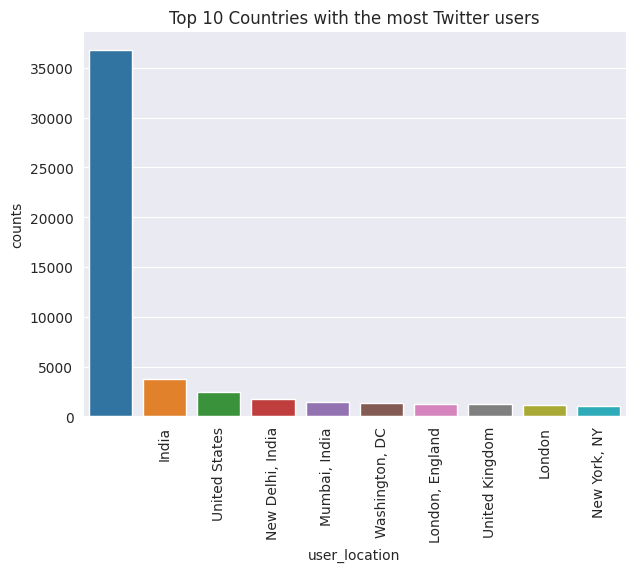

In [27]:
# Plot the top 10 countries using a bar chart
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.barplot(x='user_location',y='counts',data=top_users_by_country)
plt.xticks(rotation=90)
ax.set_title('Top 10 Countries with the most Twitter users')
plt.show()

In [28]:
# Sentiment Analysis
# Get the average sentiment score per country
sentiment_by_country = merged_df.groupby(['user_location'])['sentiment'].mean().reset_index(name='avg_sentiment').sort_values(by='avg_sentiment',ascending=False)

In [29]:
# Get the top 10 countries with the highest sentiment scores
top_sentiment_by_country = sentiment_by_country.head(10)

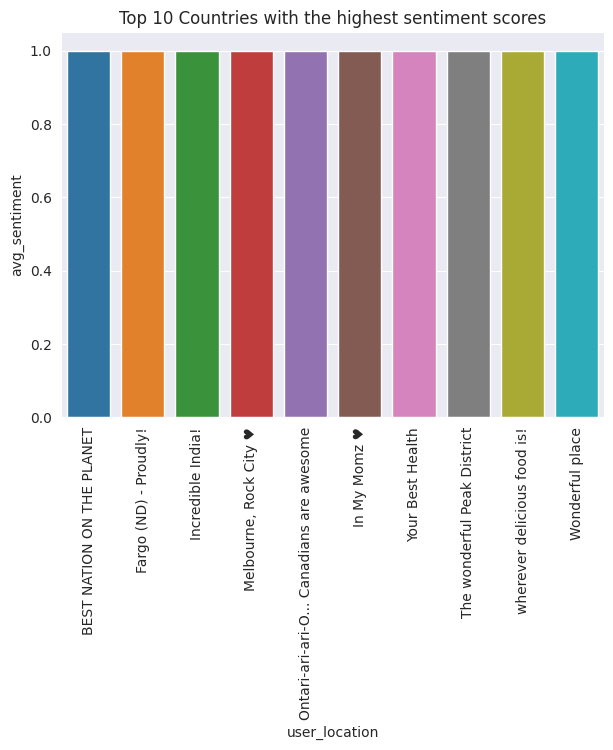

In [30]:
# Plot the top 10 countries using a bar chart
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.barplot(x='user_location',y='avg_sentiment',data=top_sentiment_by_country)
plt.xticks(rotation=90)
ax.set_title('Top 10 Countries with the highest sentiment scores')
plt.show()

In [31]:
# Print out important observations
print('The top 10 countries with the most users are: {}'.format(list(top_users_by_country['user_location'])))
print('The top 10 countries with the highest sentiment scores are: {}'.format(list(top_sentiment_by_country['user_location'])))

The top 10 countries with the most users are: ['', 'India', 'United States', 'New Delhi, India', 'Mumbai, India', 'Washington, DC', 'London, England', 'United Kingdom', 'London', 'New York, NY']
The top 10 countries with the highest sentiment scores are: ['BEST NATION ON THE PLANET', 'Fargo (ND) - Proudly!', 'Incredible India!', 'Melbourne, Rock City ♥', 'Ontari-ari-ari-O... Canadians are awesome', 'In My Momz ♥', 'Your Best Health', 'The wonderful Peak District', 'wherever delicious food is!', 'Wonderful place']


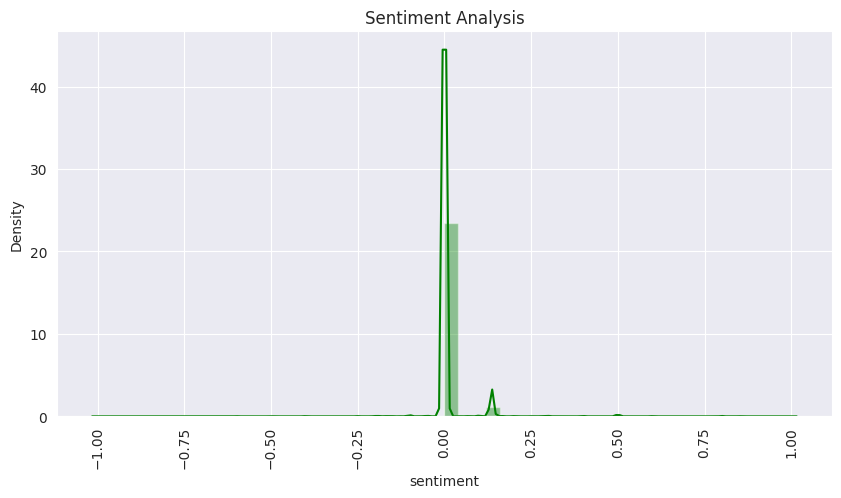

In [32]:

# Sentiment Analysis

# Plot the sentiment
plt.figure(figsize=(10,5))
sns.distplot(merged_df['sentiment'], color='green')
plt.xticks(rotation=90)
plt.title('Sentiment Analysis')
plt.show()


In [33]:


# Remove Duplicates
merged_df = merged_df.drop_duplicates()

# Check for missing values
merged_df.isnull().sum()

user_name                  0
user_location              0
user_description       10286
user_created               0
user_followers             0
user_friends               0
user_favourites            0
user_verified              0
date                       0
text                       0
hashtags               51334
source                    77
is_retweet                 0
sentiment                  0
cleaned_review_body        0
star_rating                0
is_bad_product             0
dtype: int64

In [34]:
# Clean the text
def clean_text(text):
    # Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Convert to lower case
    text = text.lower()
    # Tokenize
    words = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word=w) for w in words]
    # Join the words
    clean_text = ' '.join(words)
    return clean_text

In [35]:
# Clean the text in the review body
merged_df['cleaned_review_body'] = merged_df['text'].apply(lambda x: clean_text(x))

# Check the data
merged_df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment,cleaned_review_body,star_rating,is_bad_product
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin it [̲̅$̲̅(̲̅ιοο̲̅)̲̅$̲̅] 👸🏻💚♊️🧀🌵🌃🌙,2017-05-26 5:46:42,624,950,18775,False,2020-07-25 12:27:21,"If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0",NaN,Twitter for iPhone,False,0.000000,smelled scent hand sanitizers today someone past would think intoxicated http co qzvybrogb,950,0
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Author of Tough Sell: Fighting the Media War in Iraq. Bush Admin Alum. Newsmax Contributor. Fmr Exec Dir NYSGOP",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu,NaN,Twitter for Android,False,0.136364,hey yankee yankeespr mlb made sense player pay respect http co qvw zgypu,1677,0
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Republican #Capitalist; Sports lover - #BBN #Cincinnati #Reds #Bengals #Trump2020,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3,['COVID19'],Twitter for Android,False,0.000000,diane wdunlap realdonaldtrump trump never claimed covid hoax claim effort http co jkk vhwhb,9525,0
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs #Resist,2019-03-07 1:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW,['COVID19'],Twitter for iPhone,False,0.000000,brookbanktv one gift covid give appreciation simple thing always around http co z poalfxcw,987,0
4,DIPR-J&K,Jammu and Kashmir,"🖊️Official Twitter handle of Department of Information and Public Relations, Govt of Jammu & Kashmir",2017-02-12 6:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,0.000000,july medium bulletin novel coronavirusupdates covid kansalrohit drsyedsehrish airnewsalerts ani http co mn eecsjhh,168,0


In [36]:

# Feature Extraction
# Create a feature for the length of the review body
merged_df['review_length'] = merged_df['cleaned_review_body'].apply(lambda x: len(x.split()))

# Create a feature for the number of hashtags
merged_df['hashtag_count'] = merged_df['hashtags'].apply(lambda x: len(str(x).split(',')))

# Create a feature for the number of words in the user description
merged_df['user_description_length'] = merged_df['user_description'].apply(lambda x: len(str(x).split()))

# Create a feature for the number of followers
merged_df['user_followers_count'] = merged_df['user_followers'].apply(lambda x: len(str(x).split(',')))

# Create a feature for the number of friends
merged_df['user_friends_count'] = merged_df['user_friends'].apply(lambda x: len(str(x).split(',')))

# Create a feature for the number of favourites
merged_df['user_favourites_count'] = merged_df['user_favourites'].apply(lambda x: len(str(x).split(',')))

# Create a feature for the if the user is verified or not
def is_verified(x):
    if x == True:
        return 1
    else:
        return 0
    
merged_df['user_verified_flag'] = merged_df['user_verified'].apply(lambda x: is_verified(x))

# Check the data
merged_df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,...,cleaned_review_body,star_rating,is_bad_product,review_length,hashtag_count,user_description_length,user_followers_count,user_friends_count,user_favourites_count,user_verified_flag
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin it [̲̅$̲̅(̲̅ιοο̲̅)̲̅$̲̅] 👸🏻💚♊️🧀🌵🌃🌙,2017-05-26 5:46:42,624,950,18775,False,2020-07-25 12:27:21,"If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0",...,smelled scent hand sanitizers today someone past would think intoxicated http co qzvybrogb,950,0,13,1,10,1,1,1,0
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Author of Tough Sell: Fighting the Media War in Iraq. Bush Admin Alum. Newsmax Contributor. Fmr Exec Dir NYSGOP",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu,...,hey yankee yankeespr mlb made sense player pay respect http co qvw zgypu,1677,0,13,1,24,1,1,1,1
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Republican #Capitalist; Sports lover - #BBN #Cincinnati #Reds #Bengals #Trump2020,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3,...,diane wdunlap realdonaldtrump trump never claimed covid hoax claim effort http co jkk vhwhb,9525,0,14,1,14,1,1,1,0
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs #Resist,2019-03-07 1:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW,...,brookbanktv one gift covid give appreciation simple thing always around http co z poalfxcw,987,0,14,1,6,1,1,1,0
4,DIPR-J&K,Jammu and Kashmir,"🖊️Official Twitter handle of Department of Information and Public Relations, Govt of Jammu & Kashmir",2017-02-12 6:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh,...,july medium bulletin novel coronavirusupdates covid kansalrohit drsyedsehrish airnewsalerts ani http co mn eecsjhh,168,0,14,2,15,1,1,1,0


In [37]:
# filter to only include rows with valid user locations
merged_df = merged_df[merged_df['user_location'].notnull()]

# get the value counts of each user location
location_counts = merged_df['user_location'].value_counts()

# get the top 10 popular locations
top_locations = location_counts[:10].index.tolist()

# filter the merged_df to only include the top 10 popular locations
merged_df = merged_df[merged_df['user_location'].isin(top_locations)]

In [38]:
merged_df.shape

(52265, 24)

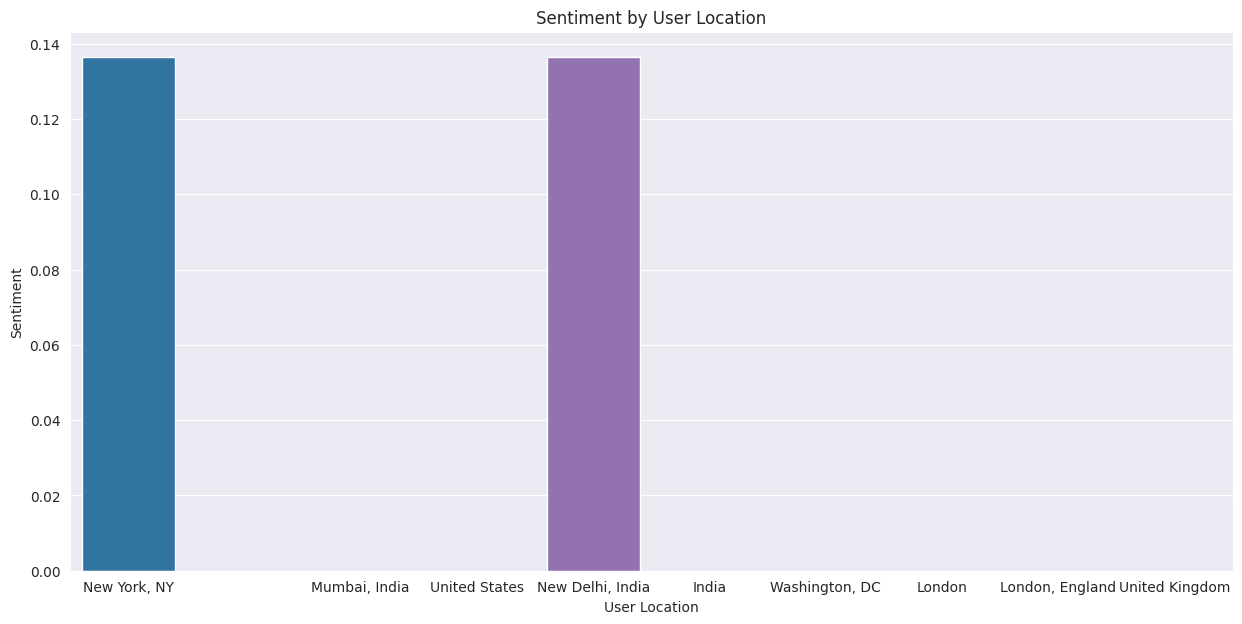

In [39]:
# Plot the sentiment by user location
plt.figure(figsize=(15,7))
sns.barplot(x = merged_df['user_location'], y = merged_df['sentiment'])
plt.title('Sentiment by User Location')
plt.xlabel('User Location')
plt.ylabel('Sentiment')
plt.show()

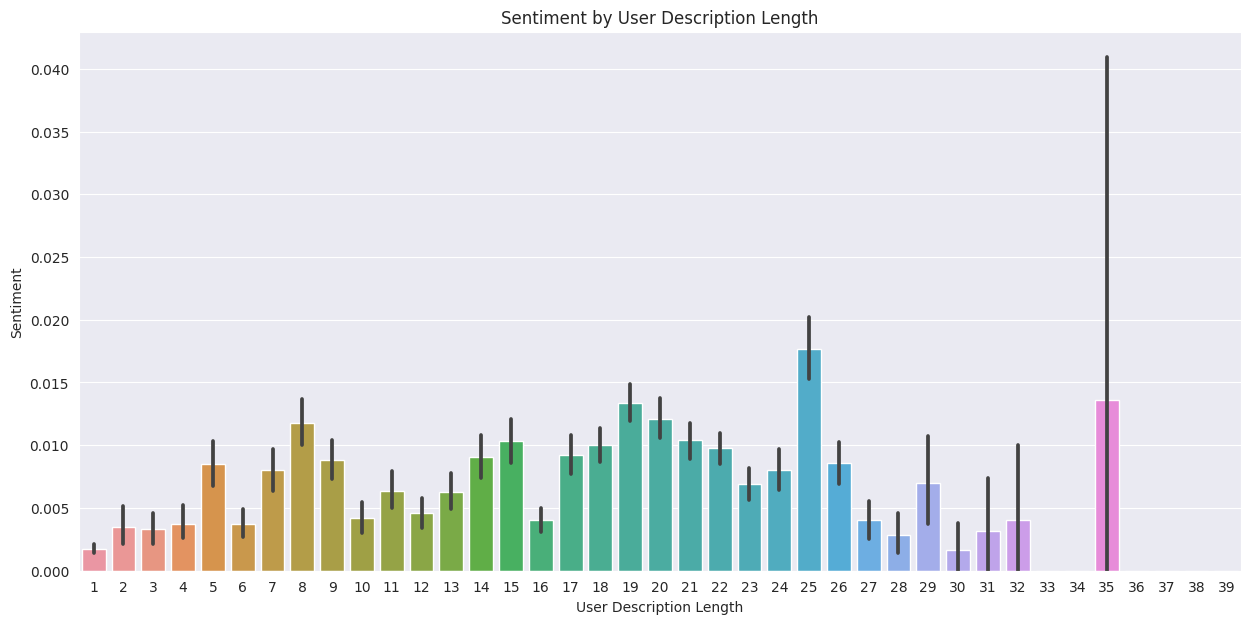

In [40]:
# Plot the sentiment by user description length
plt.figure(figsize=(15,7))
sns.barplot(x = merged_df['user_description_length'], y = merged_df['sentiment'])
plt.title('Sentiment by User Description Length')
plt.xlabel('User Description Length')
plt.ylabel('Sentiment')
plt.show()


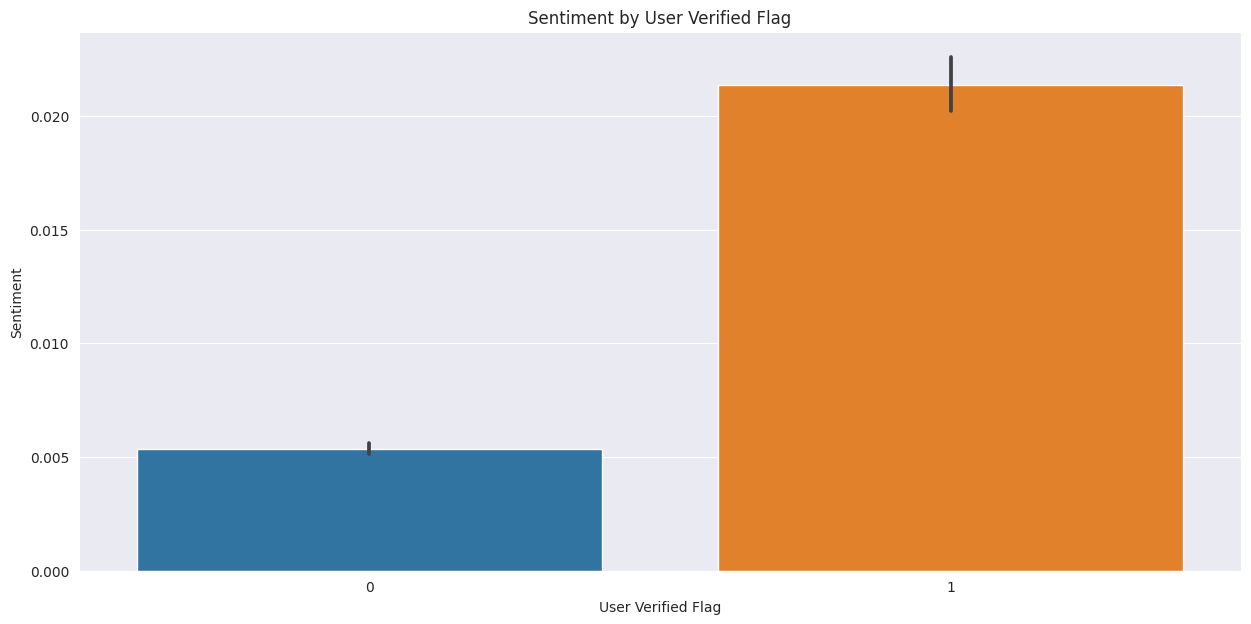

In [41]:
# Plot the sentiment by user verified flag
plt.figure(figsize=(15,7))
sns.barplot(x = merged_df['user_verified_flag'], y = merged_df['sentiment'])
plt.title('Sentiment by User Verified Flag')
plt.xlabel('User Verified Flag')
plt.ylabel('Sentiment')
plt.show()

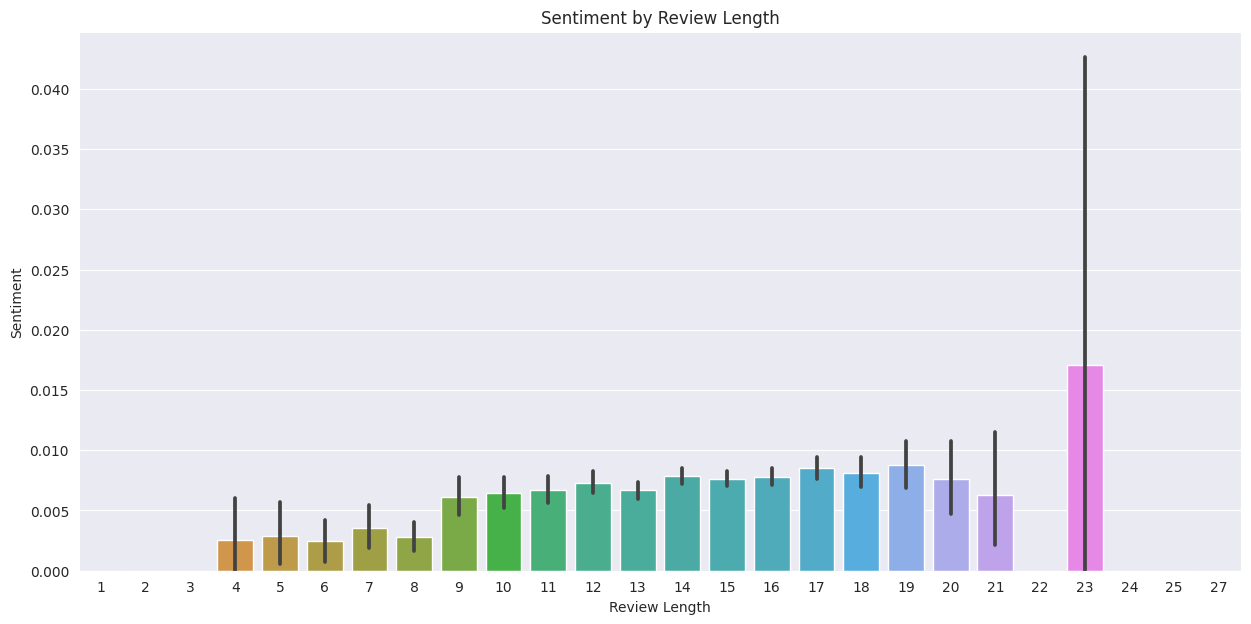

In [42]:
# Plot the sentiment by review length
plt.figure(figsize=(15,7))
sns.barplot(x = merged_df['review_length'], y = merged_df['sentiment'])
plt.title('Sentiment by Review Length')
plt.xlabel('Review Length')
plt.ylabel('Sentiment')
plt.show()

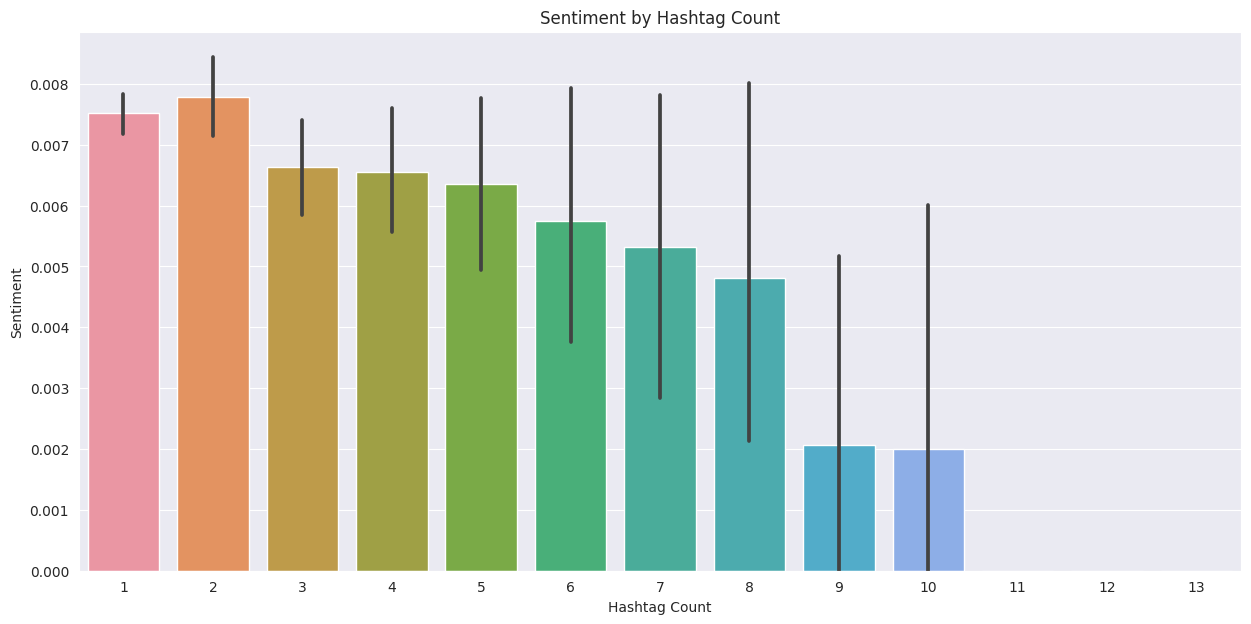

In [43]:
# Plot the sentiment by hashtag count
plt.figure(figsize=(15,7))
sns.barplot(x = merged_df['hashtag_count'], y = merged_df['sentiment'])
plt.title('Sentiment by Hashtag Count')
plt.xlabel('Hashtag Count')
plt.ylabel('Sentiment')
plt.show()